[View in Colaboratory](https://colab.research.google.com/github/redcican/Master-Thesis/blob/master/13_Activation_Functions_Classification_FashionMNIST.ipynb)

# 13 Comparison of Different Activation Functions Using FashionMNIST


## 1. Introduction to the Dataset

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes

Labels:


*   0 : T-shirt/top
*   1 : Trouser
*   2 : Pullover
*   3 : Dress
*   4 : Coat
*   5 : Sandal
*   6 : Shirt
*   7 : Sneake
*   8 : Bag
*   9 : Ankle Boot











## 2. Data Preprocessing

In [1]:
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving fashion-mnist_train.csv to fashion-mnist_train.csv
User uploaded file "fashion-mnist_train.csv" with length 133047193 bytes


In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving fashion-mnist_test.csv to fashion-mnist_test.csv
User uploaded file "fashion-mnist_test.csv" with length 22176691 bytes


In [0]:
data_train = pd.read_csv('fashion-mnist_train.csv')
data_test = pd.read_csv('fashion-mnist_test.csv')

In [0]:
img_rows, img_cols = 28, 28
input_shpae = (img_rows, img_cols, 1)

X = np.array(data_train.iloc[:,1:])
y = to_categorical(np.array(data_train.iloc[:,0]))

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=.2, random_state=13)

In [0]:
X_test = np.array(data_test.iloc[:,1:])
y_test = to_categorical(np.array(data_test.iloc[:,0]))

In [0]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255

## 3. Building the Neural Network

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, LeakyReLU, PReLU
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.layers.normalization import BatchNormalization

In [0]:
batch_size = 256
num_classes = 10
epochs = 100
img_rows, img_cols = 28, 28

### 3.1 Using Sigmoid Function

In [12]:
model_1 = Sequential()
model_1.add(Conv2D(32, kernel_size=(3,3), activation='sigmoid',
                   kernel_initializer='he_normal',input_shape=input_shpae))
model_1.add(MaxPooling2D(2,2))
model_1.add(Dropout(0.25))
model_1.add(Conv2D(64, (3,3), activation='sigmoid'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))
model_1.add(Conv2D(128,(3,3), activation='sigmoid'))
model_1.add(Dropout(0.4))
model_1.add(Flatten())
model_1.add(Dense(128, activation='sigmoid'))
model_1.add(Dropout(0.3))
model_1.add(Dense(num_classes,activation='softmax'))
  
model_1.compile(loss='categorical_crossentropy',
               optimizer='adam',metrics=['accuracy'])


model_1_history = model_1.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_val, y_val))


Train on 48000 samples, validate on 12000 samples
Epoch 1/100
 - 6s - loss: 1.7821 - acc: 0.3339 - val_loss: 0.8889 - val_acc: 0.6798
Epoch 2/100
 - 4s - loss: 0.8463 - acc: 0.6866 - val_loss: 0.7051 - val_acc: 0.7272
Epoch 3/100
 - 4s - loss: 0.7439 - acc: 0.7166 - val_loss: 0.6590 - val_acc: 0.7437
Epoch 4/100
 - 4s - loss: 0.6878 - acc: 0.7362 - val_loss: 0.6070 - val_acc: 0.7599
Epoch 5/100
 - 4s - loss: 0.6475 - acc: 0.7521 - val_loss: 0.5733 - val_acc: 0.7718
Epoch 6/100
 - 4s - loss: 0.6155 - acc: 0.7639 - val_loss: 0.5448 - val_acc: 0.7866
Epoch 7/100
 - 4s - loss: 0.5890 - acc: 0.7735 - val_loss: 0.5249 - val_acc: 0.7931
Epoch 8/100
 - 4s - loss: 0.5640 - acc: 0.7844 - val_loss: 0.5032 - val_acc: 0.8073
Epoch 9/100
 - 4s - loss: 0.5482 - acc: 0.7884 - val_loss: 0.4877 - val_acc: 0.8131
Epoch 10/100
 - 4s - loss: 0.5315 - acc: 0.7966 - val_loss: 0.4751 - val_acc: 0.8185
Epoch 11/100
 - 4s - loss: 0.5197 - acc: 0.7999 - val_loss: 0.4633 - val_acc: 0.8250
Epoch 12/100
 - 4s - los

 - 4s - loss: 0.3712 - acc: 0.8600 - val_loss: 0.3488 - val_acc: 0.8678
Epoch 35/100
 - 4s - loss: 0.3724 - acc: 0.8614 - val_loss: 0.3481 - val_acc: 0.8690
Epoch 36/100
 - 4s - loss: 0.3682 - acc: 0.8608 - val_loss: 0.3455 - val_acc: 0.8690
Epoch 37/100
 - 4s - loss: 0.3596 - acc: 0.8653 - val_loss: 0.3372 - val_acc: 0.8723
Epoch 38/100
 - 4s - loss: 0.3604 - acc: 0.8642 - val_loss: 0.3341 - val_acc: 0.8742
Epoch 39/100
 - 4s - loss: 0.3556 - acc: 0.8663 - val_loss: 0.3334 - val_acc: 0.8747
Epoch 40/100
 - 4s - loss: 0.3531 - acc: 0.8666 - val_loss: 0.3309 - val_acc: 0.8751
Epoch 41/100
 - 4s - loss: 0.3517 - acc: 0.8688 - val_loss: 0.3347 - val_acc: 0.8723
Epoch 42/100
 - 4s - loss: 0.3517 - acc: 0.8674 - val_loss: 0.3267 - val_acc: 0.8761
Epoch 43/100
 - 4s - loss: 0.3452 - acc: 0.8712 - val_loss: 0.3259 - val_acc: 0.8769
Epoch 44/100
 - 4s - loss: 0.3428 - acc: 0.8706 - val_loss: 0.3225 - val_acc: 0.8781
Epoch 45/100
 - 4s - loss: 0.3436 - acc: 0.8703 - val_loss: 0.3253 - val_acc: 

Epoch 68/100
 - 4s - loss: 0.3021 - acc: 0.8850 - val_loss: 0.2925 - val_acc: 0.8914
Epoch 69/100
 - 4s - loss: 0.2991 - acc: 0.8872 - val_loss: 0.2952 - val_acc: 0.8904
Epoch 70/100
 - 4s - loss: 0.2980 - acc: 0.8879 - val_loss: 0.2932 - val_acc: 0.8915
Epoch 71/100
 - 4s - loss: 0.2940 - acc: 0.8905 - val_loss: 0.2893 - val_acc: 0.8945
Epoch 72/100
 - 4s - loss: 0.2922 - acc: 0.8895 - val_loss: 0.2915 - val_acc: 0.8925
Epoch 73/100
 - 4s - loss: 0.2926 - acc: 0.8896 - val_loss: 0.2919 - val_acc: 0.8913
Epoch 74/100
 - 4s - loss: 0.2916 - acc: 0.8898 - val_loss: 0.2888 - val_acc: 0.8933
Epoch 75/100
 - 4s - loss: 0.2912 - acc: 0.8917 - val_loss: 0.2855 - val_acc: 0.8930
Epoch 76/100
 - 4s - loss: 0.2909 - acc: 0.8891 - val_loss: 0.2867 - val_acc: 0.8929
Epoch 77/100
 - 4s - loss: 0.2843 - acc: 0.8928 - val_loss: 0.2889 - val_acc: 0.8924
Epoch 78/100
 - 4s - loss: 0.2882 - acc: 0.8913 - val_loss: 0.2882 - val_acc: 0.8937
Epoch 79/100
 - 4s - loss: 0.2866 - acc: 0.8920 - val_loss: 0.288

In [13]:
train_loss_1, train_accuracy_1 = model_1.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_1 * 100, train_loss_1))
test_loss_1, test_accuracy_1 = model_1.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_1 * 100, test_loss_1))

Training Accuracy = 92.37 %     loss = 0.196564
Testing Accuracy = 90.35 %    loss = 0.255609


### 3.2 Using Tanh Function

In [15]:
model_2 = Sequential()
model_2.add(Conv2D(32, kernel_size=(3,3), activation='tanh',
                   kernel_initializer='he_normal',input_shape=input_shpae))
model_2.add(MaxPooling2D(2,2))
model_2.add(Dropout(0.25))
model_2.add(Conv2D(64, (3,3), activation='tanh'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))
model_2.add(Conv2D(128,(3,3), activation='tanh'))
model_2.add(Dropout(0.4))
model_2.add(Flatten())
model_2.add(Dense(128, activation='tanh'))
model_2.add(Dropout(0.3))
model_2.add(Dense(num_classes,activation='softmax'))
  
model_2.compile(loss='categorical_crossentropy',
               optimizer='adam',metrics=['accuracy'])


model_2_history = model_2.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_val, y_val))


Train on 48000 samples, validate on 12000 samples
Epoch 1/100
 - 4s - loss: 0.7183 - acc: 0.7344 - val_loss: 0.4877 - val_acc: 0.8217
Epoch 2/100
 - 4s - loss: 0.5042 - acc: 0.8166 - val_loss: 0.4391 - val_acc: 0.8363
Epoch 3/100
 - 4s - loss: 0.4427 - acc: 0.8392 - val_loss: 0.4301 - val_acc: 0.8374
Epoch 4/100
 - 4s - loss: 0.4089 - acc: 0.8518 - val_loss: 0.3741 - val_acc: 0.8612
Epoch 5/100
 - 4s - loss: 0.3787 - acc: 0.8627 - val_loss: 0.3423 - val_acc: 0.8753
Epoch 6/100
 - 4s - loss: 0.3655 - acc: 0.8680 - val_loss: 0.3326 - val_acc: 0.8822
Epoch 7/100
 - 4s - loss: 0.3450 - acc: 0.8731 - val_loss: 0.3433 - val_acc: 0.8720
Epoch 8/100
 - 4s - loss: 0.3383 - acc: 0.8779 - val_loss: 0.3094 - val_acc: 0.8868
Epoch 9/100
 - 4s - loss: 0.3276 - acc: 0.8815 - val_loss: 0.3001 - val_acc: 0.8927
Epoch 10/100
 - 4s - loss: 0.3179 - acc: 0.8839 - val_loss: 0.2968 - val_acc: 0.8937
Epoch 11/100
 - 4s - loss: 0.3125 - acc: 0.8851 - val_loss: 0.2894 - val_acc: 0.8937
Epoch 12/100
 - 4s - los

 - 4s - loss: 0.2432 - acc: 0.9116 - val_loss: 0.2468 - val_acc: 0.9097
Epoch 35/100
 - 4s - loss: 0.2469 - acc: 0.9099 - val_loss: 0.2527 - val_acc: 0.9066
Epoch 36/100
 - 4s - loss: 0.2431 - acc: 0.9100 - val_loss: 0.2455 - val_acc: 0.9110
Epoch 37/100
 - 4s - loss: 0.2381 - acc: 0.9117 - val_loss: 0.2569 - val_acc: 0.9071
Epoch 38/100
 - 4s - loss: 0.2392 - acc: 0.9127 - val_loss: 0.2380 - val_acc: 0.9125
Epoch 39/100
 - 4s - loss: 0.2378 - acc: 0.9125 - val_loss: 0.2467 - val_acc: 0.9094
Epoch 40/100
 - 4s - loss: 0.2350 - acc: 0.9136 - val_loss: 0.2390 - val_acc: 0.9127
Epoch 41/100
 - 4s - loss: 0.2347 - acc: 0.9136 - val_loss: 0.2400 - val_acc: 0.9122
Epoch 42/100
 - 4s - loss: 0.2322 - acc: 0.9153 - val_loss: 0.2439 - val_acc: 0.9113
Epoch 43/100
 - 4s - loss: 0.2334 - acc: 0.9157 - val_loss: 0.2494 - val_acc: 0.9112
Epoch 44/100
 - 4s - loss: 0.2356 - acc: 0.9132 - val_loss: 0.2399 - val_acc: 0.9118
Epoch 45/100
 - 4s - loss: 0.2305 - acc: 0.9159 - val_loss: 0.2400 - val_acc: 

Epoch 68/100
 - 4s - loss: 0.2121 - acc: 0.9227 - val_loss: 0.2421 - val_acc: 0.9117
Epoch 69/100
 - 4s - loss: 0.2130 - acc: 0.9221 - val_loss: 0.2404 - val_acc: 0.9135
Epoch 70/100
 - 4s - loss: 0.2161 - acc: 0.9208 - val_loss: 0.2378 - val_acc: 0.9137
Epoch 71/100
 - 4s - loss: 0.2120 - acc: 0.9231 - val_loss: 0.2347 - val_acc: 0.9159
Epoch 72/100
 - 4s - loss: 0.2116 - acc: 0.9228 - val_loss: 0.2416 - val_acc: 0.9149
Epoch 73/100
 - 4s - loss: 0.2090 - acc: 0.9241 - val_loss: 0.2314 - val_acc: 0.9196
Epoch 74/100
 - 4s - loss: 0.2136 - acc: 0.9217 - val_loss: 0.2393 - val_acc: 0.9143
Epoch 75/100
 - 4s - loss: 0.2117 - acc: 0.9229 - val_loss: 0.2328 - val_acc: 0.9173
Epoch 76/100
 - 4s - loss: 0.2135 - acc: 0.9231 - val_loss: 0.2452 - val_acc: 0.9128
Epoch 77/100
 - 4s - loss: 0.2058 - acc: 0.9257 - val_loss: 0.2340 - val_acc: 0.9162
Epoch 78/100
 - 4s - loss: 0.2101 - acc: 0.9236 - val_loss: 0.2348 - val_acc: 0.9153
Epoch 79/100
 - 4s - loss: 0.2090 - acc: 0.9230 - val_loss: 0.240

In [16]:
train_loss_2, train_accuracy_2 = model_2.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_2 * 100, train_loss_2))
test_loss_2, test_accuracy_2 = model_2.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_2 * 100, test_loss_2))

Training Accuracy = 95.99 %     loss = 0.114445
Testing Accuracy = 92.32 %    loss = 0.227479


### 3.3 Using ReLU Function

In [17]:
model_3 = Sequential()
model_3.add(Conv2D(32, kernel_size=(3,3), activation='relu',
                   kernel_initializer='he_normal',input_shape=input_shpae))
model_3.add(MaxPooling2D(2,2))
model_3.add(Dropout(0.25))
model_3.add(Conv2D(64, (3,3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))
model_3.add(Conv2D(128,(3,3), activation='relu'))
model_3.add(Dropout(0.4))
model_3.add(Flatten())
model_3.add(Dense(128, activation='relu'))
model_3.add(Dropout(0.3))
model_3.add(Dense(num_classes,activation='softmax'))
  
model_3.compile(loss='categorical_crossentropy',
               optimizer='adam',metrics=['accuracy'])


model_3_history = model_3.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_val, y_val))


Train on 48000 samples, validate on 12000 samples
Epoch 1/100
 - 4s - loss: 0.8447 - acc: 0.6838 - val_loss: 0.4951 - val_acc: 0.8232
Epoch 2/100
 - 4s - loss: 0.5173 - acc: 0.8095 - val_loss: 0.4051 - val_acc: 0.8582
Epoch 3/100
 - 4s - loss: 0.4420 - acc: 0.8392 - val_loss: 0.3660 - val_acc: 0.8667
Epoch 4/100
 - 4s - loss: 0.4001 - acc: 0.8526 - val_loss: 0.3330 - val_acc: 0.8777
Epoch 5/100
 - 4s - loss: 0.3688 - acc: 0.8654 - val_loss: 0.3130 - val_acc: 0.8849
Epoch 6/100
 - 4s - loss: 0.3462 - acc: 0.8735 - val_loss: 0.2943 - val_acc: 0.8918
Epoch 7/100
 - 4s - loss: 0.3288 - acc: 0.8814 - val_loss: 0.2921 - val_acc: 0.8907
Epoch 8/100
 - 4s - loss: 0.3177 - acc: 0.8847 - val_loss: 0.2855 - val_acc: 0.8920
Epoch 9/100
 - 4s - loss: 0.3089 - acc: 0.8873 - val_loss: 0.2739 - val_acc: 0.8982
Epoch 10/100
 - 4s - loss: 0.2985 - acc: 0.8915 - val_loss: 0.2671 - val_acc: 0.9020
Epoch 11/100
 - 4s - loss: 0.2891 - acc: 0.8940 - val_loss: 0.2590 - val_acc: 0.9037
Epoch 12/100
 - 4s - los

 - 4s - loss: 0.2063 - acc: 0.9219 - val_loss: 0.2239 - val_acc: 0.9183
Epoch 35/100
 - 4s - loss: 0.2084 - acc: 0.9212 - val_loss: 0.2259 - val_acc: 0.9153
Epoch 36/100
 - 4s - loss: 0.2027 - acc: 0.9240 - val_loss: 0.2244 - val_acc: 0.9183
Epoch 37/100
 - 4s - loss: 0.2051 - acc: 0.9232 - val_loss: 0.2225 - val_acc: 0.9190
Epoch 38/100
 - 4s - loss: 0.2027 - acc: 0.9237 - val_loss: 0.2198 - val_acc: 0.9203
Epoch 39/100
 - 4s - loss: 0.2017 - acc: 0.9231 - val_loss: 0.2189 - val_acc: 0.9174
Epoch 40/100
 - 4s - loss: 0.1992 - acc: 0.9249 - val_loss: 0.2133 - val_acc: 0.9211
Epoch 41/100
 - 4s - loss: 0.1984 - acc: 0.9254 - val_loss: 0.2172 - val_acc: 0.9208
Epoch 42/100
 - 4s - loss: 0.1946 - acc: 0.9271 - val_loss: 0.2209 - val_acc: 0.9192
Epoch 43/100
 - 4s - loss: 0.1930 - acc: 0.9275 - val_loss: 0.2200 - val_acc: 0.9185
Epoch 44/100
 - 4s - loss: 0.1926 - acc: 0.9271 - val_loss: 0.2136 - val_acc: 0.9213
Epoch 45/100
 - 4s - loss: 0.1946 - acc: 0.9277 - val_loss: 0.2207 - val_acc: 

Epoch 68/100
 - 4s - loss: 0.1728 - acc: 0.9350 - val_loss: 0.2175 - val_acc: 0.9229
Epoch 69/100
 - 4s - loss: 0.1716 - acc: 0.9358 - val_loss: 0.2171 - val_acc: 0.9221
Epoch 70/100
 - 4s - loss: 0.1704 - acc: 0.9352 - val_loss: 0.2191 - val_acc: 0.9207
Epoch 71/100
 - 4s - loss: 0.1691 - acc: 0.9353 - val_loss: 0.2199 - val_acc: 0.9214
Epoch 72/100
 - 4s - loss: 0.1685 - acc: 0.9347 - val_loss: 0.2178 - val_acc: 0.9230
Epoch 73/100
 - 4s - loss: 0.1708 - acc: 0.9358 - val_loss: 0.2185 - val_acc: 0.9207
Epoch 74/100
 - 4s - loss: 0.1691 - acc: 0.9349 - val_loss: 0.2208 - val_acc: 0.9223
Epoch 75/100
 - 4s - loss: 0.1696 - acc: 0.9359 - val_loss: 0.2153 - val_acc: 0.9235
Epoch 76/100
 - 4s - loss: 0.1692 - acc: 0.9351 - val_loss: 0.2161 - val_acc: 0.9229
Epoch 77/100
 - 4s - loss: 0.1646 - acc: 0.9366 - val_loss: 0.2135 - val_acc: 0.9243
Epoch 78/100
 - 4s - loss: 0.1689 - acc: 0.9364 - val_loss: 0.2151 - val_acc: 0.9231
Epoch 79/100
 - 4s - loss: 0.1681 - acc: 0.9374 - val_loss: 0.215

In [18]:
train_loss_3, train_accuracy_3 = model_3.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_3 * 100, train_loss_3))
test_loss_3, test_accuracy_3 = model_3.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_3 * 100, test_loss_3))

Training Accuracy = 97.45 %     loss = 0.076032
Testing Accuracy = 92.68 %    loss = 0.215056


### 3.4 Using LeakyReLU $\alpha=0.01$



In [20]:
model_4 = Sequential()
model_4.add(Conv2D(32, kernel_size=(3,3),kernel_initializer='he_normal',input_shape=input_shpae))
model_4.add(LeakyReLU(0.01))
model_4.add(MaxPooling2D(2,2))
model_4.add(Dropout(0.25))
model_4.add(Conv2D(64, (3,3)))
model_4.add(LeakyReLU(0.01))
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Dropout(0.25))
model_4.add(Conv2D(128,(3,3)))
model_4.add(LeakyReLU(0.01))
model_4.add(Dropout(0.4))
model_4.add(Flatten())
model_4.add(Dense(128))
model_4.add(LeakyReLU(0.01))
model_4.add(Dropout(0.3))
model_4.add(Dense(num_classes,activation='softmax'))
  
model_4.compile(loss='categorical_crossentropy',
               optimizer='adam',metrics=['accuracy'])


model_4_history = model_4.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_val, y_val))


Train on 48000 samples, validate on 12000 samples
Epoch 1/100
 - 5s - loss: 0.8317 - acc: 0.6868 - val_loss: 0.5157 - val_acc: 0.8119
Epoch 2/100
 - 5s - loss: 0.5169 - acc: 0.8064 - val_loss: 0.4238 - val_acc: 0.8440
Epoch 3/100
 - 5s - loss: 0.4483 - acc: 0.8358 - val_loss: 0.3676 - val_acc: 0.8624
Epoch 4/100
 - 5s - loss: 0.4025 - acc: 0.8532 - val_loss: 0.3348 - val_acc: 0.8762
Epoch 5/100
 - 5s - loss: 0.3696 - acc: 0.8659 - val_loss: 0.3196 - val_acc: 0.8821
Epoch 6/100
 - 5s - loss: 0.3484 - acc: 0.8725 - val_loss: 0.3024 - val_acc: 0.8887
Epoch 7/100
 - 5s - loss: 0.3309 - acc: 0.8785 - val_loss: 0.2857 - val_acc: 0.8946
Epoch 8/100
 - 5s - loss: 0.3155 - acc: 0.8839 - val_loss: 0.2756 - val_acc: 0.8942
Epoch 9/100
 - 5s - loss: 0.3042 - acc: 0.8874 - val_loss: 0.2695 - val_acc: 0.9010
Epoch 10/100
 - 5s - loss: 0.2956 - acc: 0.8922 - val_loss: 0.2708 - val_acc: 0.8988
Epoch 11/100
 - 5s - loss: 0.2870 - acc: 0.8935 - val_loss: 0.2553 - val_acc: 0.9045
Epoch 12/100
 - 5s - los

 - 5s - loss: 0.2006 - acc: 0.9241 - val_loss: 0.2129 - val_acc: 0.9222
Epoch 35/100
 - 5s - loss: 0.1989 - acc: 0.9255 - val_loss: 0.2163 - val_acc: 0.9207
Epoch 36/100
 - 5s - loss: 0.1989 - acc: 0.9251 - val_loss: 0.2214 - val_acc: 0.9178
Epoch 37/100
 - 5s - loss: 0.1950 - acc: 0.9269 - val_loss: 0.2117 - val_acc: 0.9216
Epoch 38/100
 - 5s - loss: 0.1945 - acc: 0.9272 - val_loss: 0.2123 - val_acc: 0.9218
Epoch 39/100
 - 5s - loss: 0.1922 - acc: 0.9275 - val_loss: 0.2155 - val_acc: 0.9205
Epoch 40/100
 - 5s - loss: 0.1899 - acc: 0.9294 - val_loss: 0.2086 - val_acc: 0.9233
Epoch 41/100
 - 5s - loss: 0.1865 - acc: 0.9303 - val_loss: 0.2144 - val_acc: 0.9208
Epoch 42/100
 - 5s - loss: 0.1909 - acc: 0.9280 - val_loss: 0.2111 - val_acc: 0.9208
Epoch 43/100
 - 5s - loss: 0.1873 - acc: 0.9288 - val_loss: 0.2062 - val_acc: 0.9256
Epoch 44/100
 - 5s - loss: 0.1857 - acc: 0.9301 - val_loss: 0.2090 - val_acc: 0.9240
Epoch 45/100
 - 5s - loss: 0.1832 - acc: 0.9304 - val_loss: 0.2223 - val_acc: 

Epoch 68/100
 - 5s - loss: 0.1639 - acc: 0.9384 - val_loss: 0.2054 - val_acc: 0.9282
Epoch 69/100
 - 5s - loss: 0.1625 - acc: 0.9379 - val_loss: 0.2162 - val_acc: 0.9232
Epoch 70/100
 - 5s - loss: 0.1640 - acc: 0.9369 - val_loss: 0.2114 - val_acc: 0.9247
Epoch 71/100
 - 5s - loss: 0.1631 - acc: 0.9389 - val_loss: 0.2098 - val_acc: 0.9262
Epoch 72/100
 - 5s - loss: 0.1620 - acc: 0.9381 - val_loss: 0.2131 - val_acc: 0.9241
Epoch 73/100
 - 5s - loss: 0.1621 - acc: 0.9397 - val_loss: 0.2120 - val_acc: 0.9233
Epoch 74/100
 - 5s - loss: 0.1613 - acc: 0.9385 - val_loss: 0.2140 - val_acc: 0.9263
Epoch 75/100
 - 5s - loss: 0.1597 - acc: 0.9391 - val_loss: 0.2155 - val_acc: 0.9244
Epoch 76/100
 - 5s - loss: 0.1612 - acc: 0.9383 - val_loss: 0.2154 - val_acc: 0.9267
Epoch 77/100
 - 5s - loss: 0.1593 - acc: 0.9399 - val_loss: 0.2123 - val_acc: 0.9245
Epoch 78/100
 - 5s - loss: 0.1592 - acc: 0.9396 - val_loss: 0.2115 - val_acc: 0.9244
Epoch 79/100
 - 5s - loss: 0.1569 - acc: 0.9404 - val_loss: 0.212

In [21]:
train_loss_4, train_accuracy_4 = model_4.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_4 * 100, train_loss_4))
test_loss_4, test_accuracy_4 = model_4.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_4 * 100, test_loss_4))

Training Accuracy = 97.80 %     loss = 0.064259
Testing Accuracy = 93.09 %    loss = 0.203989


### 3.5 Using PReLU

In [22]:
model_5 = Sequential()
model_5.add(Conv2D(32, kernel_size=(3,3),kernel_initializer='he_normal',input_shape=input_shpae))
model_5.add(PReLU())
model_5.add(MaxPooling2D(2,2))
model_5.add(Dropout(0.25))
model_5.add(Conv2D(64, (3,3)))
model_5.add(PReLU())
model_5.add(MaxPooling2D(pool_size=(2,2)))
model_5.add(Dropout(0.25))
model_5.add(Conv2D(128,(3,3)))
model_5.add(PReLU())
model_5.add(Dropout(0.4))
model_5.add(Flatten())
model_5.add(Dense(128))
model_5.add(PReLU())
model_5.add(Dropout(0.3))
model_5.add(Dense(num_classes,activation='softmax'))
  
model_5.compile(loss='categorical_crossentropy',
               optimizer='adam',metrics=['accuracy'])


model_5_history = model_5.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
 - 7s - loss: 0.8076 - acc: 0.6991 - val_loss: 0.4936 - val_acc: 0.8226
Epoch 2/100
 - 6s - loss: 0.4991 - acc: 0.8170 - val_loss: 0.4017 - val_acc: 0.8515
Epoch 3/100
 - 6s - loss: 0.4211 - acc: 0.8464 - val_loss: 0.3533 - val_acc: 0.8711
Epoch 4/100
 - 6s - loss: 0.3751 - acc: 0.8626 - val_loss: 0.3261 - val_acc: 0.8796
Epoch 5/100
 - 6s - loss: 0.3475 - acc: 0.8730 - val_loss: 0.2968 - val_acc: 0.8922
Epoch 6/100
 - 6s - loss: 0.3253 - acc: 0.8805 - val_loss: 0.2877 - val_acc: 0.8954
Epoch 7/100
 - 6s - loss: 0.3082 - acc: 0.8886 - val_loss: 0.2778 - val_acc: 0.8974
Epoch 8/100
 - 6s - loss: 0.2944 - acc: 0.8932 - val_loss: 0.2612 - val_acc: 0.9017
Epoch 9/100
 - 6s - loss: 0.2870 - acc: 0.8940 - val_loss: 0.2553 - val_acc: 0.9052
Epoch 10/100
 - 6s - loss: 0.2760 - acc: 0.8982 - val_loss: 0.2511 - val_acc: 0.9067
Epoch 11/100
 - 6s - loss: 0.2657 - acc: 0.9020 - val_loss: 0.2490 - val_acc: 0.9052
Epoch 12/100
 - 6s - los

 - 6s - loss: 0.1881 - acc: 0.9295 - val_loss: 0.2075 - val_acc: 0.9238
Epoch 35/100
 - 6s - loss: 0.1853 - acc: 0.9306 - val_loss: 0.2147 - val_acc: 0.9203
Epoch 36/100
 - 6s - loss: 0.1830 - acc: 0.9319 - val_loss: 0.2111 - val_acc: 0.9229
Epoch 37/100
 - 6s - loss: 0.1824 - acc: 0.9312 - val_loss: 0.2229 - val_acc: 0.9167
Epoch 38/100
 - 6s - loss: 0.1839 - acc: 0.9302 - val_loss: 0.2094 - val_acc: 0.9234
Epoch 39/100
 - 6s - loss: 0.1795 - acc: 0.9323 - val_loss: 0.2105 - val_acc: 0.9240
Epoch 40/100
 - 6s - loss: 0.1804 - acc: 0.9306 - val_loss: 0.2114 - val_acc: 0.9246
Epoch 41/100
 - 6s - loss: 0.1776 - acc: 0.9327 - val_loss: 0.2089 - val_acc: 0.9231
Epoch 42/100
 - 6s - loss: 0.1762 - acc: 0.9331 - val_loss: 0.2096 - val_acc: 0.9243
Epoch 43/100
 - 6s - loss: 0.1761 - acc: 0.9330 - val_loss: 0.2144 - val_acc: 0.9228
Epoch 44/100
 - 6s - loss: 0.1758 - acc: 0.9330 - val_loss: 0.2098 - val_acc: 0.9240
Epoch 45/100
 - 6s - loss: 0.1715 - acc: 0.9352 - val_loss: 0.2087 - val_acc: 

Epoch 68/100
 - 6s - loss: 0.1533 - acc: 0.9419 - val_loss: 0.2159 - val_acc: 0.9277
Epoch 69/100
 - 6s - loss: 0.1520 - acc: 0.9421 - val_loss: 0.2131 - val_acc: 0.9272
Epoch 70/100
 - 6s - loss: 0.1552 - acc: 0.9416 - val_loss: 0.2123 - val_acc: 0.9264
Epoch 71/100
 - 6s - loss: 0.1496 - acc: 0.9421 - val_loss: 0.2048 - val_acc: 0.9297
Epoch 72/100
 - 6s - loss: 0.1517 - acc: 0.9401 - val_loss: 0.2180 - val_acc: 0.9250
Epoch 73/100
 - 6s - loss: 0.1486 - acc: 0.9426 - val_loss: 0.2140 - val_acc: 0.9263
Epoch 74/100
 - 6s - loss: 0.1497 - acc: 0.9433 - val_loss: 0.2101 - val_acc: 0.9291
Epoch 75/100
 - 6s - loss: 0.1490 - acc: 0.9423 - val_loss: 0.2109 - val_acc: 0.9278
Epoch 76/100
 - 6s - loss: 0.1497 - acc: 0.9427 - val_loss: 0.2190 - val_acc: 0.9228
Epoch 77/100
 - 6s - loss: 0.1523 - acc: 0.9416 - val_loss: 0.2176 - val_acc: 0.9271
Epoch 78/100
 - 6s - loss: 0.1462 - acc: 0.9436 - val_loss: 0.2159 - val_acc: 0.9254
Epoch 79/100
 - 6s - loss: 0.1475 - acc: 0.9435 - val_loss: 0.217

In [23]:
train_loss_5, train_accuracy_5 = model_5.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_5 * 100, train_loss_5))
test_loss_5, test_accuracy_5 = model_5.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_5 * 100, test_loss_5))

Training Accuracy = 97.99 %     loss = 0.058791
Testing Accuracy = 92.98 %    loss = 0.214872


### 3.6 Using Linear Function

In [25]:
model_6 = Sequential()
model_6.add(Conv2D(32, kernel_size=(3,3),activation='linear',kernel_initializer='he_normal',input_shape=input_shpae))
model_6.add(MaxPooling2D(2,2))
model_6.add(Dropout(0.25))
model_6.add(Conv2D(64, (3,3),activation='linear'))
model_6.add(MaxPooling2D(pool_size=(2,2)))
model_6.add(Dropout(0.25))
model_6.add(Conv2D(128,(3,3),activation='linear'))
model_6.add(Dropout(0.4))
model_6.add(Flatten())
model_6.add(Dense(128,activation='linear'))
model_6.add(Dropout(0.3))
model_6.add(Dense(num_classes,activation='softmax'))
  
model_6.compile(loss='categorical_crossentropy',
               optimizer='adam',metrics=['accuracy'])


model_6_history = model_6.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
 - 4s - loss: 0.7752 - acc: 0.7287 - val_loss: 0.5647 - val_acc: 0.8034
Epoch 2/100
 - 4s - loss: 0.5236 - acc: 0.8153 - val_loss: 0.4834 - val_acc: 0.8303
Epoch 3/100
 - 4s - loss: 0.4600 - acc: 0.8388 - val_loss: 0.3930 - val_acc: 0.8599
Epoch 4/100
 - 4s - loss: 0.4206 - acc: 0.8519 - val_loss: 0.3691 - val_acc: 0.8718
Epoch 5/100
 - 4s - loss: 0.4021 - acc: 0.8579 - val_loss: 0.3823 - val_acc: 0.8632
Epoch 6/100
 - 4s - loss: 0.3864 - acc: 0.8624 - val_loss: 0.3571 - val_acc: 0.8725
Epoch 7/100
 - 4s - loss: 0.3734 - acc: 0.8683 - val_loss: 0.3302 - val_acc: 0.8831
Epoch 8/100
 - 4s - loss: 0.3664 - acc: 0.8707 - val_loss: 0.3352 - val_acc: 0.8805
Epoch 9/100
 - 4s - loss: 0.3575 - acc: 0.8736 - val_loss: 0.3258 - val_acc: 0.8846
Epoch 10/100
 - 4s - loss: 0.3539 - acc: 0.8737 - val_loss: 0.3298 - val_acc: 0.8838
Epoch 11/100
 - 4s - loss: 0.3426 - acc: 0.8786 - val_loss: 0.3204 - val_acc: 0.8864
Epoch 12/100
 - 4s - los

 - 4s - loss: 0.2964 - acc: 0.8950 - val_loss: 0.3095 - val_acc: 0.8909
Epoch 35/100
 - 4s - loss: 0.2938 - acc: 0.8946 - val_loss: 0.2979 - val_acc: 0.8957
Epoch 36/100
 - 3s - loss: 0.2955 - acc: 0.8940 - val_loss: 0.3062 - val_acc: 0.8908
Epoch 37/100
 - 4s - loss: 0.2949 - acc: 0.8942 - val_loss: 0.2950 - val_acc: 0.8992
Epoch 38/100
 - 4s - loss: 0.2908 - acc: 0.8973 - val_loss: 0.2905 - val_acc: 0.8988
Epoch 39/100
 - 4s - loss: 0.2932 - acc: 0.8958 - val_loss: 0.2940 - val_acc: 0.8965
Epoch 40/100
 - 4s - loss: 0.2904 - acc: 0.8952 - val_loss: 0.2903 - val_acc: 0.8978
Epoch 41/100
 - 4s - loss: 0.2863 - acc: 0.8973 - val_loss: 0.3019 - val_acc: 0.8953
Epoch 42/100
 - 4s - loss: 0.2899 - acc: 0.8955 - val_loss: 0.2954 - val_acc: 0.8969
Epoch 43/100
 - 4s - loss: 0.2898 - acc: 0.8968 - val_loss: 0.2954 - val_acc: 0.8969
Epoch 44/100
 - 4s - loss: 0.2861 - acc: 0.8968 - val_loss: 0.2866 - val_acc: 0.8972
Epoch 45/100
 - 4s - loss: 0.2848 - acc: 0.8981 - val_loss: 0.3000 - val_acc: 

Epoch 68/100
 - 4s - loss: 0.2767 - acc: 0.9011 - val_loss: 0.2903 - val_acc: 0.8969
Epoch 69/100
 - 4s - loss: 0.2734 - acc: 0.9019 - val_loss: 0.2862 - val_acc: 0.8995
Epoch 70/100
 - 4s - loss: 0.2710 - acc: 0.9022 - val_loss: 0.3030 - val_acc: 0.8914
Epoch 71/100
 - 4s - loss: 0.2747 - acc: 0.9020 - val_loss: 0.2839 - val_acc: 0.8997
Epoch 72/100
 - 4s - loss: 0.2729 - acc: 0.9005 - val_loss: 0.2900 - val_acc: 0.8974
Epoch 73/100
 - 4s - loss: 0.2709 - acc: 0.9025 - val_loss: 0.2871 - val_acc: 0.8976
Epoch 74/100
 - 4s - loss: 0.2691 - acc: 0.9026 - val_loss: 0.2920 - val_acc: 0.8963
Epoch 75/100
 - 4s - loss: 0.2710 - acc: 0.9023 - val_loss: 0.2927 - val_acc: 0.8966
Epoch 76/100
 - 4s - loss: 0.2725 - acc: 0.9023 - val_loss: 0.2863 - val_acc: 0.9000
Epoch 77/100
 - 4s - loss: 0.2684 - acc: 0.9029 - val_loss: 0.2878 - val_acc: 0.8998
Epoch 78/100
 - 4s - loss: 0.2700 - acc: 0.9023 - val_loss: 0.2882 - val_acc: 0.8982
Epoch 79/100
 - 4s - loss: 0.2712 - acc: 0.9016 - val_loss: 0.293

In [27]:
train_loss_6, train_accuracy_6 = model_6.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_6 * 100, train_loss_6))
test_loss_6, test_accuracy_6 = model_6.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_6 * 100, test_loss_6))

Training Accuracy = 93.76 %     loss = 0.177598
Testing Accuracy = 90.48 %    loss = 0.278831


### 3.7 Using Elu Function

In [28]:
model_7 = Sequential()
model_7.add(Conv2D(32, kernel_size=(3,3),activation='elu',kernel_initializer='he_normal',input_shape=input_shpae))
model_7.add(MaxPooling2D(2,2))
model_7.add(Dropout(0.25))
model_7.add(Conv2D(64, (3,3),activation='elu'))
model_7.add(MaxPooling2D(pool_size=(2,2)))
model_7.add(Dropout(0.25))
model_7.add(Conv2D(128,(3,3),activation='elu'))
model_7.add(Dropout(0.4))
model_7.add(Flatten())
model_7.add(Dense(128,activation='elu'))
model_7.add(Dropout(0.3))
model_7.add(Dense(num_classes,activation='softmax'))
  
model_7.compile(loss='categorical_crossentropy',
               optimizer='adam',metrics=['accuracy'])


model_7_history = model_7.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
 - 5s - loss: 0.6964 - acc: 0.7434 - val_loss: 0.5156 - val_acc: 0.8091
Epoch 2/100
 - 4s - loss: 0.4751 - acc: 0.8276 - val_loss: 0.4085 - val_acc: 0.8508
Epoch 3/100
 - 4s - loss: 0.4262 - acc: 0.8461 - val_loss: 0.3700 - val_acc: 0.8610
Epoch 4/100
 - 4s - loss: 0.3865 - acc: 0.8609 - val_loss: 0.3277 - val_acc: 0.8797
Epoch 5/100
 - 4s - loss: 0.3645 - acc: 0.8688 - val_loss: 0.3362 - val_acc: 0.8744
Epoch 6/100
 - 4s - loss: 0.3490 - acc: 0.8718 - val_loss: 0.3111 - val_acc: 0.8842
Epoch 7/100
 - 4s - loss: 0.3349 - acc: 0.8776 - val_loss: 0.3100 - val_acc: 0.8900
Epoch 8/100
 - 4s - loss: 0.3235 - acc: 0.8808 - val_loss: 0.3089 - val_acc: 0.8836
Epoch 9/100
 - 4s - loss: 0.3189 - acc: 0.8827 - val_loss: 0.2933 - val_acc: 0.8902
Epoch 10/100
 - 4s - loss: 0.3057 - acc: 0.8876 - val_loss: 0.2942 - val_acc: 0.8922
Epoch 11/100
 - 4s - loss: 0.2976 - acc: 0.8909 - val_loss: 0.2710 - val_acc: 0.8966
Epoch 12/100
 - 4s - los

 - 4s - loss: 0.2202 - acc: 0.9179 - val_loss: 0.2405 - val_acc: 0.9137
Epoch 35/100
 - 4s - loss: 0.2222 - acc: 0.9181 - val_loss: 0.2359 - val_acc: 0.9145
Epoch 36/100
 - 4s - loss: 0.2150 - acc: 0.9193 - val_loss: 0.2376 - val_acc: 0.9138
Epoch 37/100
 - 4s - loss: 0.2142 - acc: 0.9192 - val_loss: 0.2390 - val_acc: 0.9158
Epoch 38/100
 - 4s - loss: 0.2149 - acc: 0.9198 - val_loss: 0.2407 - val_acc: 0.9122
Epoch 39/100
 - 4s - loss: 0.2106 - acc: 0.9217 - val_loss: 0.2501 - val_acc: 0.9097
Epoch 40/100
 - 4s - loss: 0.2089 - acc: 0.9216 - val_loss: 0.2435 - val_acc: 0.9147
Epoch 41/100
 - 4s - loss: 0.2114 - acc: 0.9198 - val_loss: 0.2444 - val_acc: 0.9120
Epoch 42/100
 - 4s - loss: 0.2071 - acc: 0.9223 - val_loss: 0.2351 - val_acc: 0.9172
Epoch 43/100
 - 4s - loss: 0.2078 - acc: 0.9225 - val_loss: 0.2467 - val_acc: 0.9127
Epoch 44/100
 - 4s - loss: 0.2025 - acc: 0.9239 - val_loss: 0.2377 - val_acc: 0.9153
Epoch 45/100
 - 4s - loss: 0.2037 - acc: 0.9242 - val_loss: 0.2360 - val_acc: 

Epoch 68/100
 - 4s - loss: 0.1827 - acc: 0.9304 - val_loss: 0.2359 - val_acc: 0.9199
Epoch 69/100
 - 4s - loss: 0.1801 - acc: 0.9317 - val_loss: 0.2375 - val_acc: 0.9187
Epoch 70/100
 - 4s - loss: 0.1783 - acc: 0.9330 - val_loss: 0.2418 - val_acc: 0.9187
Epoch 71/100
 - 4s - loss: 0.1816 - acc: 0.9314 - val_loss: 0.2265 - val_acc: 0.9212
Epoch 72/100
 - 4s - loss: 0.1804 - acc: 0.9318 - val_loss: 0.2401 - val_acc: 0.9194
Epoch 73/100
 - 4s - loss: 0.1794 - acc: 0.9340 - val_loss: 0.2361 - val_acc: 0.9157
Epoch 74/100
 - 4s - loss: 0.1799 - acc: 0.9323 - val_loss: 0.2314 - val_acc: 0.9206
Epoch 75/100
 - 4s - loss: 0.1756 - acc: 0.9342 - val_loss: 0.2361 - val_acc: 0.9205
Epoch 76/100
 - 4s - loss: 0.1817 - acc: 0.9328 - val_loss: 0.2329 - val_acc: 0.9204
Epoch 77/100
 - 4s - loss: 0.1756 - acc: 0.9340 - val_loss: 0.2307 - val_acc: 0.9195
Epoch 78/100
 - 4s - loss: 0.1758 - acc: 0.9336 - val_loss: 0.2361 - val_acc: 0.9184
Epoch 79/100
 - 4s - loss: 0.1761 - acc: 0.9327 - val_loss: 0.237

In [29]:
train_loss_7, train_accuracy_7 = model_7.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_7 * 100, train_loss_7))
test_loss_7, test_accuracy_7 = model_7.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_7 * 100, test_loss_7))

Training Accuracy = 97.69 %     loss = 0.065298
Testing Accuracy = 92.56 %    loss = 0.233332


## Plot the Result and Compare

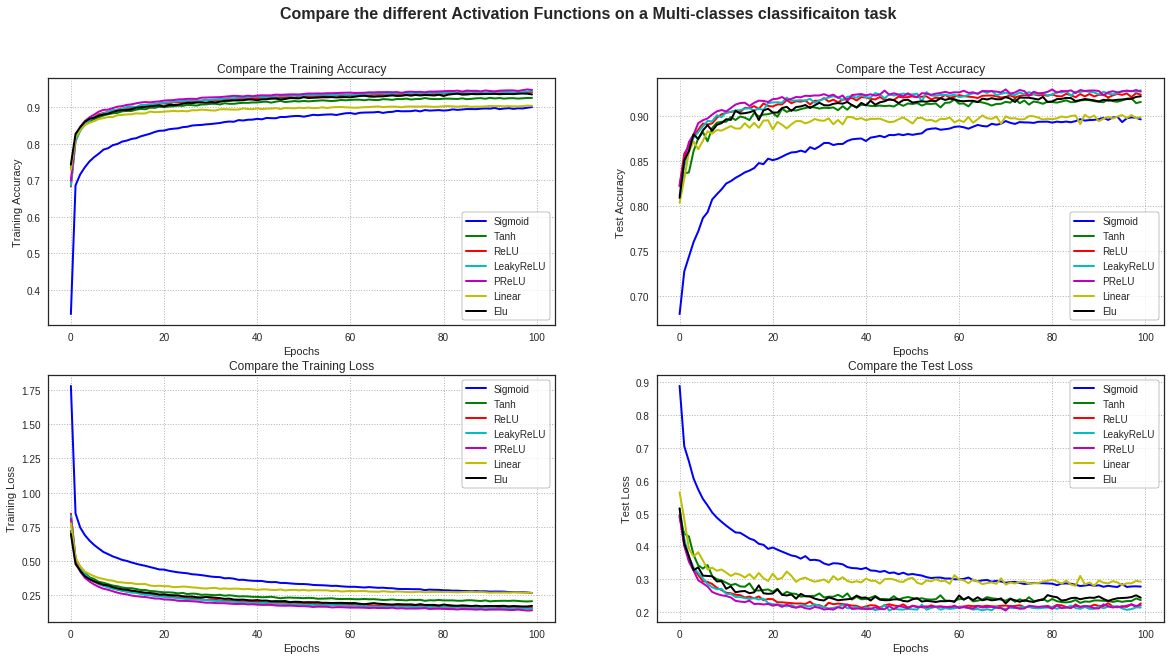

In [31]:
plt.style.use('seaborn-white')
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,10))
ax1.plot(model_1_history.history['acc'],color='b',linewidth=2,label='Sigmoid')
ax1.plot(model_2_history.history['acc'],color='g',linewidth=2,label='Tanh')
ax1.plot(model_3_history.history['acc'],color='r',linewidth=2,label='ReLU')
ax1.plot(model_4_history.history['acc'],color='c',linewidth=2,label='LeakyReLU')
ax1.plot(model_5_history.history['acc'],color='m',linewidth=2,label='PReLU')
ax1.plot(model_6_history.history['acc'],color='y',linewidth=2,label='Linear')
ax1.plot(model_7_history.history['acc'],color='k',linewidth=2,label='Elu')
ax1.legend(frameon=True,edgecolor='black')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Training Accuracy')
ax1.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax1.set_title('Compare the Training Accuracy')


ax2.plot(model_1_history.history['val_acc'],color='b',linewidth=2,label='Sigmoid')
ax2.plot(model_2_history.history['val_acc'],color='g',linewidth=2,label='Tanh')
ax2.plot(model_3_history.history['val_acc'],color='r',linewidth=2,label='ReLU')
ax2.plot(model_4_history.history['val_acc'],color='c',linewidth=2,label='LeakyReLU')
ax2.plot(model_5_history.history['val_acc'],color='m',linewidth=2,label='PReLU')
ax2.plot(model_6_history.history['val_acc'],color='y',linewidth=2,label='Linear')
ax2.plot(model_7_history.history['val_acc'],color='k',linewidth=2,label='Elu')
ax2.legend(frameon=True,edgecolor='black')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Test Accuracy')
ax2.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax2.set_title('Compare the Test Accuracy')


ax3.plot(model_1_history.history['loss'],color='b',linewidth=2,label='Sigmoid')
ax3.plot(model_2_history.history['loss'],color='g',linewidth=2,label='Tanh')
ax3.plot(model_3_history.history['loss'],color='r',linewidth=2,label='ReLU')
ax3.plot(model_4_history.history['loss'],color='c',linewidth=2,label='LeakyReLU')
ax3.plot(model_5_history.history['loss'],color='m',linewidth=2,label='PReLU')
ax3.plot(model_6_history.history['loss'],color='y',linewidth=2,label='Linear')
ax3.plot(model_7_history.history['loss'],color='k',linewidth=2,label='Elu')
ax3.legend(frameon=True,edgecolor='black')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Training Loss')
ax3.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax3.set_title('Compare the Training Loss')

ax4.plot(model_1_history.history['val_loss'],color='b',linewidth=2,label='Sigmoid')
ax4.plot(model_2_history.history['val_loss'],color='g',linewidth=2,label='Tanh')
ax4.plot(model_3_history.history['val_loss'],color='r',linewidth=2,label='ReLU')
ax4.plot(model_4_history.history['val_loss'],color='c',linewidth=2,label='LeakyReLU')
ax4.plot(model_5_history.history['val_loss'],color='m',linewidth=2,label='PReLU')
ax4.plot(model_6_history.history['val_loss'],color='y',linewidth=2,label='Linear')
ax4.plot(model_7_history.history['val_loss'],color='k',linewidth=2,label='Elu')
ax4.legend(frameon=True,edgecolor='black')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Test Loss')
ax4.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax4.set_title('Compare the Test Loss')

fig.suptitle('Compare the different Activation Functions on a Multi-classes classificaiton task',fontsize=16, fontweight='bold')
plt.show()
